# Preparación

In [1]:
Sys.setenv(SPARK_HOME='/opt/spark')
.libPaths(c(file.path(Sys.getenv('SPARK_HOME'), 'R', 'lib'), .libPaths()))

In [2]:
library(SparkR)


Attaching package: 'SparkR'

The following objects are masked from 'package:stats':

    filter, na.omit

The following objects are masked from 'package:base':

    intersect, rbind, sample, subset, summary, table, transform



In [3]:
sc <- sparkR.init(sparkPackages="com.databricks:spark-csv_2.11:1.2.0")

Launching java with spark-submit command /opt/spark/bin/spark-submit  --packages com.databricks:spark-csv_2.11:1.2.0 sparkr-shell /tmp/Rtmp5C3zl3/backend_port2dc641819588 


In [4]:
sqlContext <- sparkRSQL.init(sc)

La documentación está [aquí](https://spark.apache.org/docs/latest/sparkr.html)

# Dataframes

In [5]:
iris.rdd <- createDataFrame(sqlContext, iris)

Warning message:
In FUN(X[[i]], ...): Use Sepal_Length instead of Sepal.Length  as column nameWarning message:
In FUN(X[[i]], ...): Use Sepal_Width instead of Sepal.Width  as column nameWarning message:
In FUN(X[[i]], ...): Use Petal_Length instead of Petal.Length  as column nameWarning message:
In FUN(X[[i]], ...): Use Petal_Width instead of Petal.Width  as column name

In [6]:
head(iris.rdd)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


También se pueden crear los `dataframes` desde archivo

In [7]:
tsum_a <- read.df(sqlContext, "data/data_tsumoto/TSUM_A.CSV", "com.databricks.spark.csv", header="true")

In [8]:
head(tsum_a)

,ID,SEX,Birthday,Description,First Date,Admission,Diagnosis
1,2110,F,1934/2/13,94.02.14,93.02.10,+,RA susp.
2,11408,F,1937/5/2,96.12.01,73.01.01,+,PSS
3,12052,F,1956/4/14,91.08.13,,+,SLE
4,14872,F,1953/9/21,97.08.13,,+,MCTD
5,27654,F,1936/3/25,,92.02.03,+,"RA, SLE susp"
6,30609,F,1944/7/13,91.08.13,,-,"SLE, MCTD"


In [9]:
printSchema(tsum_a)

root
 |-- ID: string (nullable = true)
 |-- SEX: string (nullable = true)
 |-- Birthday: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- First Date: string (nullable = true)
 |-- Admission: string (nullable = true)
 |-- Diagnosis: string (nullable = true)


In [10]:
head(select(tsum_a, tsum_a$SEX))

,SEX
1,F
2,F
3,F
4,F
5,F
6,F


In [14]:
head(select(tsum_a, 'Admission'))

,Admission
1,+
2,+
3,+
4,+
5,+
6,-


In [12]:
head(filter(tsum_a, tsum_a$SEX == 'M'))


,ID,SEX,Birthday,Description,First Date,Admission,Diagnosis
1,43003,M,1937/11/24,94.03.08,94.03.08,-,Raynaud's phenomenon
2,57266,M,1923/7/25,97.02.03,93.02.05,+,RA
3,81043,M,1967/3/25,,,-,MCTD
4,133382,M,1934/9/3,96.12.05,92.10.13,+,SLE
5,385129,M,1939/8/3,,,-,BEHCET
6,387907,M,1937/4/6,96.12.03,,+,BEHCET


In [15]:
head(summarize(groupBy(tsum_a, tsum_a$SEX), count = n(tsum_a$SEX)))

,SEX,count
1,F,1025
2,M,202
3,,13


In [17]:
tsum_a_summary <- describe(tsum_a)

In [18]:
tsum_a_summary

DataFrame[summary:string, ID:string, SEX:string, Birthday:string, Description:string, First Date:string, Admission:string, Diagnosis:string]

In [19]:
nrow(tsum_a)

[1] 1240

In [20]:
?collect

collect {SparkR},R Documentation
x,A SparkSQL DataFrame
stringsAsFactors,(Optional) A logical indicating whether or not string columns should be converted to factors. FALSE by default.


In [26]:
registerTempTable(tsum_a, "tsum_a")

In [28]:
vacios <- collect(sql(sqlContext, "select * from tsum_a where SEX = ''"))

In [30]:
head(vacios, n = 20)

,ID,SEX,Birthday,Description,First Date,Admission,Diagnosis
1,115562,,1943/3/17,97.08.20,,+,SLE
2,205391,,1929/9/11,98.05.18,92.03.16,+,"BEHCET (sS^), RA susp"
3,1557464,,1950/1/16,,94.03.14,-,SJS
4,2096012,,1966/8/11,91.08.13,80.07.01,+,SJS
5,2484453,,1944/12/3,94.02.08,92.12.15,+,SLE
6,2927464,,1931/4/4,94.02.06,,+,RA
7,3001367,,1929/5/1,,,-,PSS
8,3522019,,1950/9/21,91.08.13,85.12.02,-,SJS
9,4447870,,1929/12/14,94.02.22,,-,"PSS, SJS"
10,4601425,,1929/5/31,,,-,PSS/CREST


In [31]:
library(ggplot2)

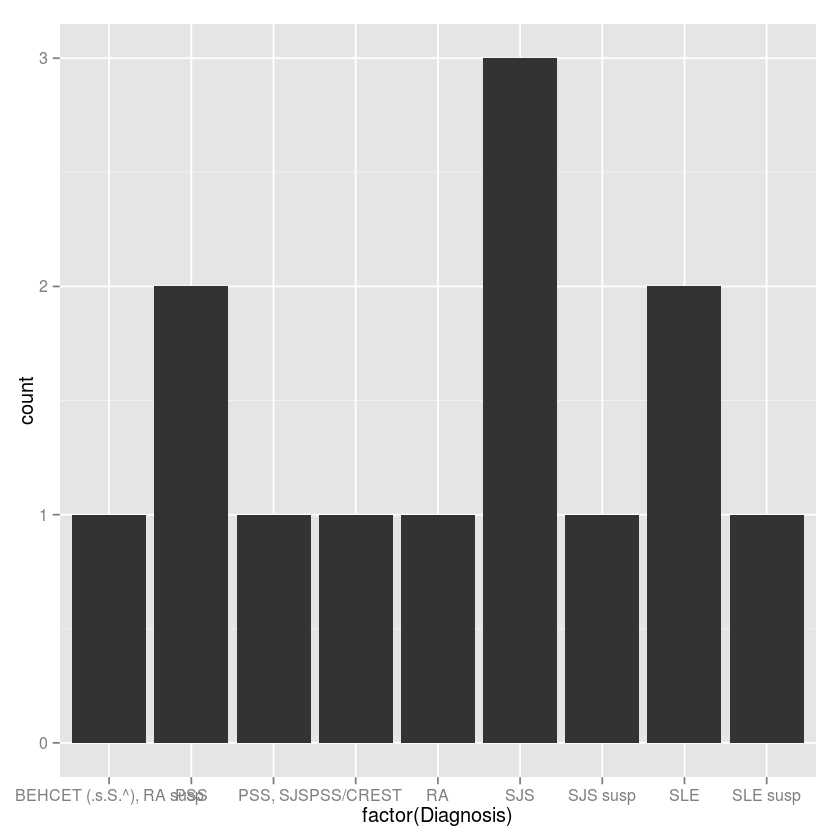

In [34]:
ggplot(data=vacios, aes(x=factor(Diagnosis))) + geom_bar()

## Manipulación de datos

In [35]:
collect(select(tsum_a, "SEX", "Diagnosis"))

,SEX,Diagnosis
1,F,RA susp.
2,F,PSS
3,F,SLE
4,F,MCTD
5,F,"RA, SLE susp"
6,F,"SLE, MCTD"
7,M,Raynaud's phenomenon
8,F,SLE
9,F,PM/DM
10,M,RA
